In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

file_path = "/Users/antonis/Desktop/Artuino/artuino/data/slow_fast.csv"
df = pd.read_csv(file_path)

In [143]:
df.describe()

,d,y,p,r,a_x,a_y,a_z
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,449.993902,-6.821951,-5.363354,0.789939,42.762195,708.676829,-296.317073
std,45.862625,20.026838,7.551791,6.128533,2972.293981,2894.088012,2744.314727
min,328.000000,-70.820000,-42.860000,-10.140000,-6134.000000,-11618.000000,-13651.000000
25%,413.000000,-23.707500,-11.150000,-3.670000,-603.750000,-416.000000,-679.000000
50%,446.000000,-7.995000,-5.705000,1.010000,-154.000000,95.500000,-86.000000
75%,490.250000,10.210000,0.180000,4.680000,439.000000,959.750000,392.250000
max,580.000000,62.100000,12.690000,39.510000,23653.000000,9857.000000,27798.000000


In [144]:
# removing first 90 observations
df = df[90:].reset_index()
# removing outliers
df_filtered = df
for col in ['a_x', 'a_y', 'a_z']:
    df_filtered = df_filtered[np.abs(stats.zscore(df_filtered[col])) < 3]
df_filtered = df_filtered.reset_index()

In [147]:
stats.zscore(df_filtered[col])

array([ 0.36910086,  0.44478645,  0.63324359,  0.57193826,  0.63929844,
        0.66200412,  0.64308272,  0.64308272,  0.58707538,  0.73996029,
        0.75131313,  0.60145564,  0.22756879, -0.01084085, -0.27801101,
       -0.44527618, -0.40591967,  0.1980514 ,  0.0708996 , -0.03808766,
       -0.10544785, -1.19834789, -1.93476876, -2.4070469 , -2.56371609,
       -2.45397197,  0.59994193,  0.93977027,  1.15471737,  1.1713682 ,
        1.21450899,  0.05576248,  0.06862903,  0.13296179,  0.23135307,
        0.32596006,  0.75131313,  0.7293643 ,  0.57572254,  0.37969684,
        0.23816477, -0.28028158, -0.40591967, -0.56561629, -0.57091428,
       -0.46419758, -2.69995016, -2.58263749, -2.15047272, -1.93098448,
        1.36360962,  1.37344875,  1.22737554,  1.08735719,  1.01924015,
        0.07014274,  0.11782467,  0.21243167,  0.3183915 ,  0.4129985 ,
        0.06635846, -0.10393414, -0.39078255, -0.65719586,  0.25103132,
        0.29190155,  0.25557246,  0.22454136])

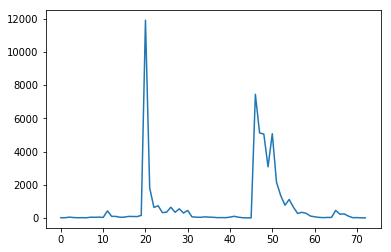

In [145]:
velocity = []
v0 = 0

for i in df.index[1:]:
    event_0 = df.iloc[i - 1]
    event_t = df.iloc[i]
    dt = (pd.to_datetime(event_t['timestamp']) - pd.to_datetime(event_0['timestamp'])).total_seconds()
    at = (event_t['a_x']**2 + event_t['a_y']**2)**1/2
    vt = at*dt*(10**-3)
    velocity.append(vt)
velocity = np.array(velocity)

plt.plot(velocity)
plt.ylim()
plt.show()

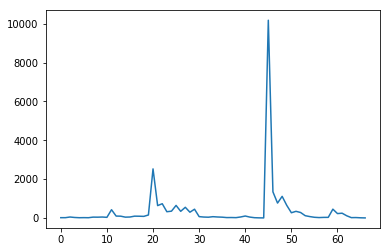

In [146]:
velocity = []
v0 = 0

for i in df_filtered.index[1:]:
    event_0 = df_filtered.iloc[i - 1]
    event_t = df_filtered.iloc[i]
    dt = (pd.to_datetime(event_t['timestamp']) - pd.to_datetime(event_0['timestamp'])).total_seconds()
    at = (event_t['a_x']**2 + event_t['a_y']**2)**1/2
    vt = at*dt*(10**-3)
    velocity.append(vt)
velocity = np.array(velocity)

plt.plot(velocity)
plt.ylim()
plt.show()

In [129]:
df_filtered.index[1:]

RangeIndex(start=1, stop=68, step=1)

(100.0, 200.0)

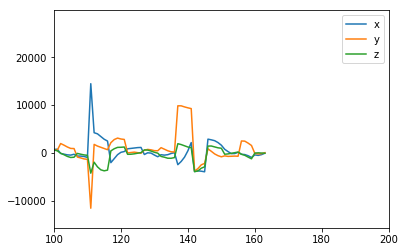

In [130]:
plt.plot(df['a_x'], label = 'x')
plt.plot(df['a_y'], label = 'y')
plt.plot(df['a_z'], label = 'z')
plt.ylim()
plt.xlim(100,200)
plt.legend()
plt.xlim()

In [28]:
from scipy import stats
stats.describe(velocity)

DescribeResult(nobs=225, minmax=(0.19056700000000001, 62598.25539), mean=1185.7020983000002, variance=33984108.81698387, skewness=8.163708790525828, kurtosis=71.62254670946135)

{'whiskers': [<matplotlib.lines.Line2D at 0x109145470>,
 'caps': [<matplotlib.lines.Line2D at 0x109145d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x109145320>],
 'medians': [<matplotlib.lines.Line2D at 0x10914d5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x10914d9e8>],
 'means': []}

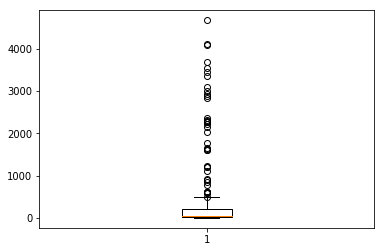

In [32]:
plt.boxplot(velocity[velocity < 5000])